In [36]:
import glob

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, ZeroPadding2D,MaxPool2D,SeparableConv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
import matplotlib.pyplot as plt


In [2]:
PATH = './chest_xray/'

TRAIN_DATA_DIR = PATH + 'train'
TEST_DATA_DIR = PATH + 'test'

TRAIN_DATA_NORMAL_FILE = PATH + 'train/NORMAL/'
TRAIN_DATA_PNEUMONIA_FILE = PATH + 'train/PNEUMONIA/'
VAL_DATA_NORMAL_FILE = PATH + 'val/NORMAL/'
VAL_DATA_PNEUMONIA_FILE = PATH + 'val/PNEUMONIA/'
TEST_DATA_NORMAL_FILE = PATH + 'test/NORMAL/'
TEST_DATA_PNEUMONIA_FILE = PATH + 'test/PNEUMONIA/'

IMAGE_SIZE = (256,256)
BATCH_SIZE = 32
EPOCHS = 10

In [3]:
train_data_normal = glob.glob(TRAIN_DATA_NORMAL_FILE + '*jpeg')
train_data_pneumonia = glob.glob(TRAIN_DATA_PNEUMONIA_FILE + '*jpeg')
val_data_normal = glob.glob(VAL_DATA_NORMAL_FILE + '*jpeg')
val_data_pneumonia = glob.glob(VAL_DATA_PNEUMONIA_FILE + '*jpeg')
test_data_normal = glob.glob(TEST_DATA_NORMAL_FILE + '*jpeg')
test_data_pneumonia = glob.glob(TEST_DATA_PNEUMONIA_FILE + '*jpeg')

In [4]:
print("TEST DATA")
print("Normal: {} Pneumonia: {}".format(len(train_data_normal),len(train_data_pneumonia)))
print("\nVALIDATION DATA")
print("Normal: {} Pneumonia: {}".format(len(val_data_normal),len(val_data_pneumonia)))
print("\nTEST DATA")
print("Normal: {} Pneumonia: {}".format(len(test_data_normal),len(test_data_pneumonia)))

TEST DATA
Normal: 1341 Pneumonia: 3875

VALIDATION DATA
Normal: 8 Pneumonia: 8

TEST DATA
Normal: 234 Pneumonia: 390


In [5]:
# train_data_generator = ImageDataGenerator(rescale = 1/255, zoom_range=0.3, vertical_flip=True)

train_data_generator=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 )

test_data_generator = ImageDataGenerator(rescale = 1/255)

In [6]:

train_generator = train_data_generator.flow_from_directory(
        TRAIN_DATA_DIR,
        target_size = IMAGE_SIZE,
        batch_size = BATCH_SIZE,
        class_mode = 'binary')

test_generator = test_data_generator.flow_from_directory(
        TEST_DATA_DIR,
        target_size = IMAGE_SIZE,
        batch_size = BATCH_SIZE,
        class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.



model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.SeparableConv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model = tf.keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



In [7]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [9]:
class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(train_generator.classes), 
            train_generator.classes)


/Users/kolevak/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [10]:

history=model.fit(train_generator, epochs = EPOCHS, validation_data = test_generator)

Epoch 1/10
163/163 [==============================] - 179s 1s/step - loss: 0.8619 - accuracy: 0.7278 - val_loss: 0.4581 - val_accuracy: 0.8093
Epoch 2/10
163/163 [==============================] - 190s 1s/step - loss: 0.3596 - accuracy: 0.8389 - val_loss: 0.3956 - val_accuracy: 0.8510
Epoch 3/10
163/163 [==============================] - 193s 1s/step - loss: 0.3010 - accuracy: 0.8721 - val_loss: 0.4523 - val_accuracy: 0.8109
Epoch 4/10
163/163 [==============================] - 191s 1s/step - loss: 0.2771 - accuracy: 0.8751 - val_loss: 0.5137 - val_accuracy: 0.7276
Epoch 5/10
163/163 [==============================] - 195s 1s/step - loss: 0.2815 - accuracy: 0.8774 - val_loss: 0.3971 - val_accuracy: 0.8109
Epoch 6/10
163/163 [==============================] - 204s 1s/step - loss: 0.2785 - accuracy: 0.8851 - val_loss: 0.3952 - val_accuracy: 0.8446
Epoch 7/10
163/163 [==============================] - 197s 1s/step - loss: 0.2668 - accuracy: 0.8834 - val_loss: 0.3697 - val_accuracy: 0.8654

In [12]:
model.save("pneumonia_model.h5")

<Figure size 432x288 with 0 Axes>

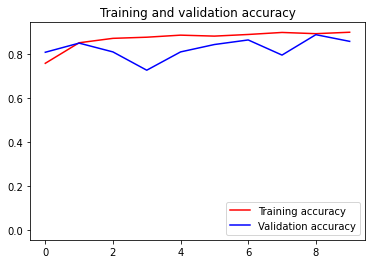

<Figure size 432x288 with 0 Axes>

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(range(0, 1))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


In [38]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

def load_image(filename):
	# load the image
	img = load_img(filename, target_size=IMAGE_SIZE)
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,256,256, 3)
	# center pixel data
	img = img.astype('float32')
	return img

In [43]:
img = load_image(val_data_pneumonia[5])
result = model.predict(img)
print(result)

[[1.]]
